<a href="https://colab.research.google.com/github/charecktowa/Chemistry-ML/blob/main/101_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# McCulloch-Pitts Neuron and Perceptron


# Introduction

In this notebook, we'll explore the fundamental building blocks of artificial neural networks, starting from the very first computational model of a neuron proposed in 1943. We'll:

1. **Understand the McCulloch-Pitts Neuron** - The first mathematical model of a neuron
2. **Implement it from scratch** - Using only Python and NumPy
3. **Evolve to the Perceptron** - A learnable version of the neuron
4. **Visualize the learning process** - See how these models make decisions
5. **Transition to PyTorch** - Modern implementation of these classical concepts

By the end, you'll have a deep understanding of how neural networks work at their most fundamental level.

---


In [33]:
# Cell 1: Setup and Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyBboxPatch, FancyArrowPatch
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# McCulloch-Pitts Neuron (1943)

The McCulloch-Pitts neuron was the first computational model of a biological neuron, proposed by Warren McCulloch and Walter Pitts in 1943. It's a binary threshold unit that laid the foundation for all modern neural networks.

## Key Characteristics:
- **Binary inputs**: Only accepts 0 or 1
- **Binary output**: Produces only 0 or 1
- **Fixed weights**: No learning capability
- **Threshold activation**: Fires if sum exceeds threshold

## Mathematical Model:
$$y = \begin{cases}
1 & \text{if } \sum_{i=1}^{n} x_i \cdot w_i \geq \theta \\
0 & \text{otherwise}
\end{cases}$$

Where:
- $x_i$ = input values (0 or 1)
- $w_i$ = weights (fixed)
- $\theta$ = threshold
- $y$ = output (0 or 1)

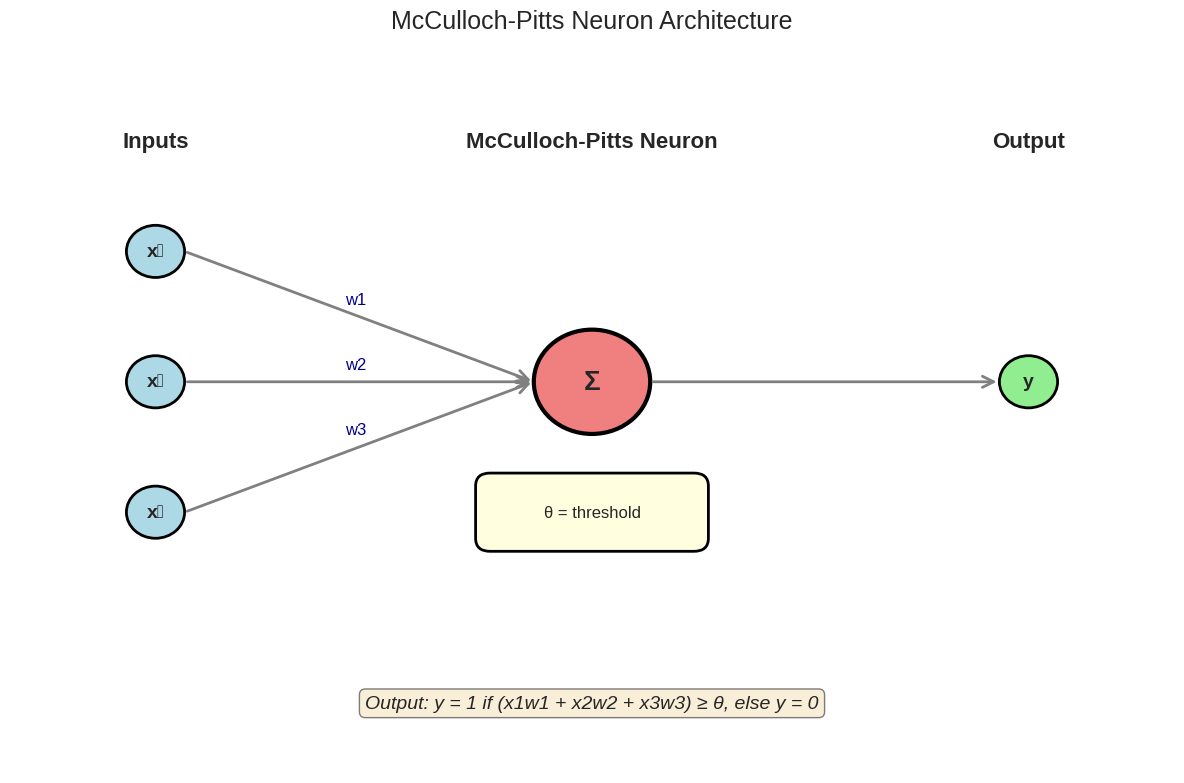

In [38]:
# @title
# Cell 2: Visualize McCulloch-Pitts Neuron Architecture
def draw_mcculloch_pitts_neuron():
    """Draw a visual representation of McCulloch-Pitts neuron"""
    fig, ax = plt.subplots(figsize=(12, 8))

    # Input nodes
    input_positions = [(1, 3), (1, 2), (1, 1)]
    input_labels = ['x₁', 'x₂', 'x₃']

    # Draw input nodes
    for pos, label in zip(input_positions, input_labels):
        circle = Circle(pos, 0.2, color='lightblue', ec='black', linewidth=2)
        ax.add_patch(circle)
        ax.text(pos[0], pos[1], label, ha='center', va='center', fontsize=14, fontweight='bold')

    # Draw neuron (larger circle)
    neuron = Circle((4, 2), 0.4, color='lightcoral', ec='black', linewidth=3)
    ax.add_patch(neuron)
    ax.text(4, 2, 'Σ', ha='center', va='center', fontsize=20, fontweight='bold')

    # Draw threshold box
    threshold_box = FancyBboxPatch((3.3, 0.8), 1.4, 0.4,
                                   boxstyle="round,pad=0.1",
                                   facecolor='lightyellow',
                                   edgecolor='black', linewidth=2)
    ax.add_patch(threshold_box)
    ax.text(4, 1, 'θ = threshold', ha='center', va='center', fontsize=12)

    # Draw output node
    output = Circle((7, 2), 0.2, color='lightgreen', ec='black', linewidth=2)
    ax.add_patch(output)
    ax.text(7, 2, 'y', ha='center', va='center', fontsize=14, fontweight='bold')

    # Draw connections with weights
    weights = ['w1', 'w2', 'w3']
    for i, (pos, weight) in enumerate(zip(input_positions, weights)):
        arrow = FancyArrowPatch(
            (pos[0] + 0.2, pos[1]), (4 - 0.4, 2),
            connectionstyle="arc3,rad=0",
            arrowstyle='->',
            mutation_scale=20,
            lw=2,
            color='gray'
        )
        ax.add_patch(arrow)
        # Add weight labels
        mid_x = (pos[0] + 4) / 2
        mid_y = (pos[1] + 2) / 2
        ax.text(mid_x - 0.2, mid_y + 0.1, weight, fontsize=12, color='darkblue')

    # Output arrow
    output_arrow = FancyArrowPatch(
        (4.4, 2), (6.8, 2),
        connectionstyle="arc3,rad=0",
        arrowstyle='->',
        mutation_scale=20,
        lw=2,
        color='gray'
    )
    ax.add_patch(output_arrow)

    # Add title and labels
    ax.text(1, 3.8, 'Inputs', fontsize=16, fontweight='bold', ha='center')
    ax.text(4, 3.8, 'McCulloch-Pitts Neuron', fontsize=16, fontweight='bold', ha='center')
    ax.text(7, 3.8, 'Output', fontsize=16, fontweight='bold', ha='center')

    # Add explanation
    ax.text(4, -0.5, 'Output: y = 1 if (x1w1 + x2w2 + x3w3) ≥ θ, else y = 0',
            ha='center', fontsize=14, style='italic',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='wheat', alpha=0.5))

    ax.set_xlim(0, 8)
    ax.set_ylim(-1, 4.5)
    ax.axis('off')
    plt.title('McCulloch-Pitts Neuron Architecture', fontsize=18, pad=20)
    plt.tight_layout()
    plt.show()

draw_mcculloch_pitts_neuron()

## Mathematical Formulation

The McCulloch-Pitts neuron computes the following output:

$$
y =
\begin{cases}
1 & \text{if } \sum_{i=1}^{n} x_i \geq \theta \\
0 & \text{otherwise}
\end{cases}
$$

Where:

- $x_i $ are binary inputs (either 0 or 1)  
- $\theta$ is the threshold  
- $y$ is the binary output (either 0 or 1)


### Implementation

In [19]:
import numpy as np

def mcculloch_pitts_neuron(inputs, threshold):
    """
    Computes the output of a McCulloch-Pitts neuron.

    Args:
        inputs (list or array-like): Binary input values (0 or 1).
        threshold (int): Activation threshold.

    Returns:
        int: 1 if the sum of inputs >= threshold, else 0.
    """
    total = np.sum(inputs)
    return 1 if total >= threshold else 0

In [20]:
def test_logic_gate(threshold, gate_name, truth_table):
    """
    Test a McCulloch-Pitts neuron configured with a specific threshold
    on a logic gate truth table.
    """
    print(f"\n{gate_name} Gate (threshold={threshold}):")
    print("Input1 | Input2 | Expected | Actual | Correct")
    print("-" * 45)

    correct = 0
    for inputs, expected in truth_table:
        output = mcculloch_pitts_neuron(inputs, threshold)
        is_correct = output == expected
        correct += is_correct
        print(f"  {inputs[0]}    |   {inputs[1]}    |    {expected}     |   {output}    | {'✓' if is_correct else '✗'}")

    accuracy = correct / len(truth_table) * 100
    print(f"Accuracy: {accuracy:.0f}%")
    return accuracy == 100

# Truth tables using plain lists
AND_gate = [
    ([0, 0], 0),
    ([0, 1], 0),
    ([1, 0], 0),
    ([1, 1], 1)
]

OR_gate = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 1)
]

# Test gates
test_logic_gate(threshold=2, gate_name="AND", truth_table=AND_gate)
test_logic_gate(threshold=1, gate_name="OR", truth_table=OR_gate)


AND Gate (threshold=2):
Input1 | Input2 | Expected | Actual | Correct
---------------------------------------------
  0    |   0    |    0     |   0    | ✓
  0    |   1    |    0     |   0    | ✓
  1    |   0    |    0     |   0    | ✓
  1    |   1    |    1     |   1    | ✓
Accuracy: 100%

OR Gate (threshold=1):
Input1 | Input2 | Expected | Actual | Correct
---------------------------------------------
  0    |   0    |    0     |   0    | ✓
  0    |   1    |    1     |   1    | ✓
  1    |   0    |    1     |   1    | ✓
  1    |   1    |    1     |   1    | ✓
Accuracy: 100%


True

In [21]:
# XOR truth table using plain lists
XOR_gate = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 0)
]

# Try different thresholds to demonstrate failure
print("\nTrying different thresholds for XOR gate:")
for threshold in range(0, 4):
    print(f"\nThreshold = {threshold}")
    success = test_logic_gate(threshold, "XOR", XOR_gate)
    if success:
        print("✓ XOR gate implemented successfully!")
        break
else:
    print("\n❌ Cannot implement XOR with a single McCulloch-Pitts neuron!")


Trying different thresholds for XOR gate:

Threshold = 0

XOR Gate (threshold=0):
Input1 | Input2 | Expected | Actual | Correct
---------------------------------------------
  0    |   0    |    0     |   1    | ✗
  0    |   1    |    1     |   1    | ✓
  1    |   0    |    1     |   1    | ✓
  1    |   1    |    0     |   1    | ✗
Accuracy: 50%

Threshold = 1

XOR Gate (threshold=1):
Input1 | Input2 | Expected | Actual | Correct
---------------------------------------------
  0    |   0    |    0     |   0    | ✓
  0    |   1    |    1     |   1    | ✓
  1    |   0    |    1     |   1    | ✓
  1    |   1    |    0     |   1    | ✗
Accuracy: 75%

Threshold = 2

XOR Gate (threshold=2):
Input1 | Input2 | Expected | Actual | Correct
---------------------------------------------
  0    |   0    |    0     |   0    | ✓
  0    |   1    |    1     |   0    | ✗
  1    |   0    |    1     |   0    | ✗
  1    |   1    |    0     |   1    | ✗
Accuracy: 25%

Threshold = 3

XOR Gate (threshold=3):

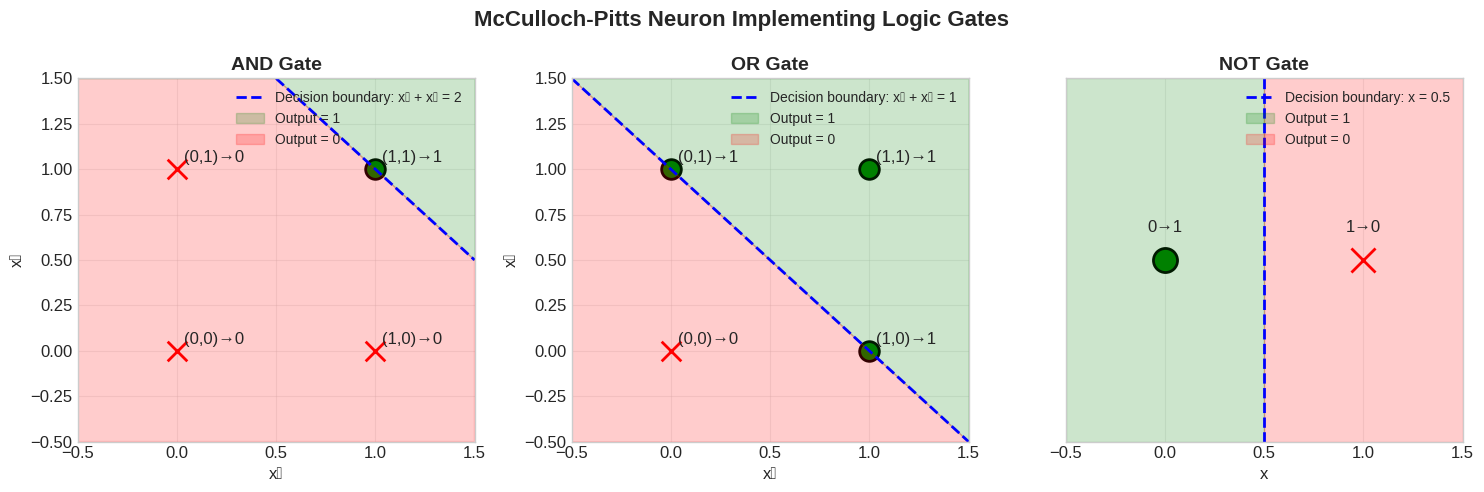

In [39]:
# @title
# Cell 5: Visualize Logic Gates Implementation
def visualize_logic_gates():
    """Visualize AND, OR, and NOT gates with their decision boundaries"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # AND Gate
    ax = axes[0]
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    and_outputs = [0, 0, 0, 1]  # AND truth table

    # Plot points
    for i, (inp, out) in enumerate(zip(inputs, and_outputs)):
        color = 'green' if out == 1 else 'red'
        marker = 'o' if out == 1 else 'x'
        ax.scatter(inp[0], inp[1], c=color, s=200, marker=marker, edgecolors='black', linewidth=2)
        ax.annotate(f'({inp[0]},{inp[1]})→{out}', (inp[0], inp[1]),
                   xytext=(5, 5), textcoords='offset points')

    # Decision boundary for AND: x1 + x2 = 2
    x = np.linspace(-0.5, 1.5, 100)
    y = 2 - x
    ax.plot(x, y, 'b--', linewidth=2, label='Decision boundary: x₁ + x₂ = 2')
    ax.fill_between(x, y, 1.5, alpha=0.2, color='green', label='Output = 1')
    ax.fill_between(x, y, -0.5, alpha=0.2, color='red', label='Output = 0')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title('AND Gate', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right', fontsize=10)

    # OR Gate
    ax = axes[1]
    or_outputs = [0, 1, 1, 1]  # OR truth table

    for i, (inp, out) in enumerate(zip(inputs, or_outputs)):
        color = 'green' if out == 1 else 'red'
        marker = 'o' if out == 1 else 'x'
        ax.scatter(inp[0], inp[1], c=color, s=200, marker=marker, edgecolors='black', linewidth=2)
        ax.annotate(f'({inp[0]},{inp[1]})→{out}', (inp[0], inp[1]),
                   xytext=(5, 5), textcoords='offset points')

    # Decision boundary for OR: x1 + x2 = 1
    y = 1 - x
    ax.plot(x, y, 'b--', linewidth=2, label='Decision boundary: x₁ + x₂ = 1')
    ax.fill_between(x, y, 1.5, alpha=0.2, color='green', label='Output = 1')
    ax.fill_between(x, y, -0.5, alpha=0.2, color='red', label='Output = 0')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title('OR Gate', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right', fontsize=10)

    # NOT Gate
    ax = axes[2]
    not_inputs = [0, 1]
    not_outputs = [1, 0]

    for inp, out in zip(not_inputs, not_outputs):
        color = 'green' if out == 1 else 'red'
        marker = 'o' if out == 1 else 'x'
        ax.scatter(inp, 0.5, c=color, s=300, marker=marker, edgecolors='black', linewidth=2)
        ax.annotate(f'{inp}→{out}', (inp, 0.5), xytext=(0, 20), textcoords='offset points', ha='center')

    # Decision boundary for NOT: -x = 0, i.e., x = 0
    ax.axvline(x=0.5, color='b', linestyle='--', linewidth=2, label='Decision boundary: x = 0.5')
    ax.fill_betweenx([0, 1], -0.5, 0.5, alpha=0.2, color='green', label='Output = 1')
    ax.fill_betweenx([0, 1], 0.5, 1.5, alpha=0.2, color='red', label='Output = 0')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(0, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('')
    ax.set_title('NOT Gate', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right', fontsize=10)
    ax.set_yticks([])

    plt.suptitle('McCulloch-Pitts Neuron Implementing Logic Gates', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

visualize_logic_gates()

## Limitations of McCulloch-Pitts Neuron

While groundbreaking for its time, the McCulloch-Pitts neuron has several limitations:

1. **No Learning**: Weights are fixed and must be manually set
2. **Binary Only**: Can't handle continuous values
3. **Linear Separability**: Can only solve linearly separable problems
4. **No XOR**: Cannot implement XOR gate with a single neuron

Let's demonstrate the XOR problem:

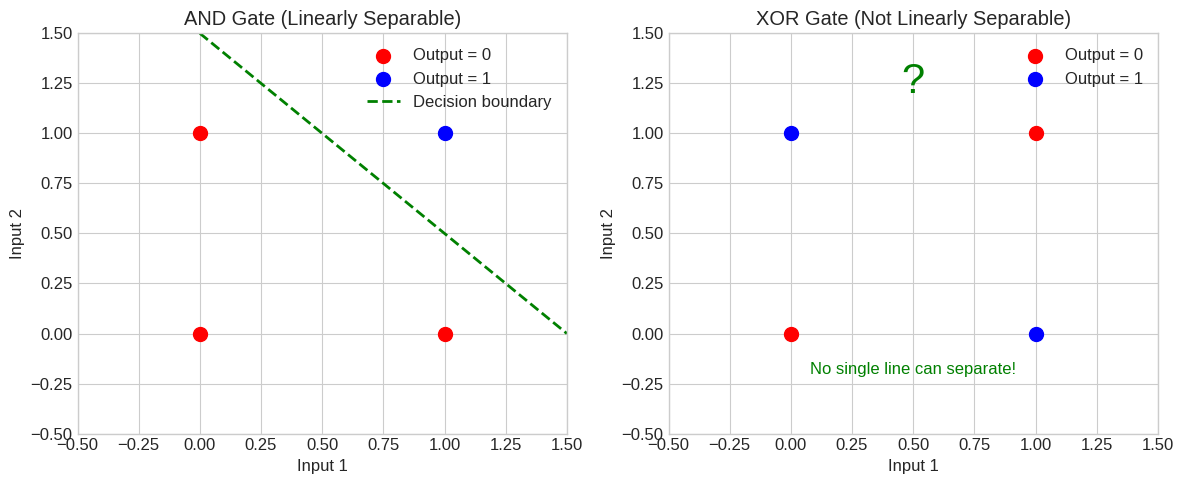

The XOR Problem

XOR Truth Table:
x₁ | x₂ | XOR
---|----|----|
0  | 0  | 0
1  | 0  | 1
0  | 1  | 1
1  | 1  | 0


In [43]:
# @title
# Visualize why XOR cannot be solved by a single neuron
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot AND gate (linearly separable)
ax1.scatter([0, 0, 1], [0, 1, 0], c='red', s=100, label='Output = 0')
ax1.scatter([1], [1], c='blue', s=100, label='Output = 1')
ax1.plot([0, 1.5], [1.5, 0], 'g--', linewidth=2, label='Decision boundary')
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 1.5)
ax1.set_xlabel('Input 1')
ax1.set_ylabel('Input 2')
ax1.set_title('AND Gate (Linearly Separable)')
ax1.legend()
ax1.grid(True)

# Plot XOR gate (not linearly separable)
ax2.scatter([0, 1], [0, 1], c='red', s=100, label='Output = 0')
ax2.scatter([0, 1], [1, 0], c='blue', s=100, label='Output = 1')
ax2.text(0.5, 1.2, '?', fontsize=30, ha='center', color='green')
ax2.text(0.5, -0.2, 'No single line can separate!', ha='center', color='green')
ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.5, 1.5)
ax2.set_xlabel('Input 1')
ax2.set_ylabel('Input 2')
ax2.set_title('XOR Gate (Not Linearly Separable)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Cell 6: The XOR Problem
print("The XOR Problem")
print("=" * 50)
print("\nXOR Truth Table:")
print("x₁ | x₂ | XOR")
print("---|----|----|")
print("0  | 0  | 0")
print("1  | 0  | 1")
print("0  | 1  | 1")
print("1  | 1  | 0")

# The Perceptron (1957)

Frank Rosenblatt's Perceptron was a revolutionary advancement over the McCulloch-Pitts neuron because it could **learn from examples**. This was the birth of machine learning as we know it today.

## Key Improvements:
- **Continuous inputs**: Can handle real-valued inputs
- **Learning algorithm**: Weights adjust automatically
- **Error correction**: Learns from mistakes
- **Convergence theorem**: Guaranteed to find solution (if one exists)

## Mathematical Model:
$$y = f\left(\sum_{i=1}^{n} w_i \cdot x_i + b\right)$$

Where:
- $f$ is the activation function (step function)
- $b$ is the bias term (learnable threshold)
- Weights $w_i$ are updated using: $w_i^{new} = w_i^{old} + \alpha \cdot (target - output) \cdot x_i$

In [45]:
# Cell 7: Implement Perceptron from Scratch
class Perceptron:
    """
    Perceptron implementation with learning capability
    """

    def __init__(self, n_features, learning_rate=0.1):
        """
        Initialize perceptron with random weights

        Parameters:
        n_features (int): Number of input features
        learning_rate (float): Learning rate for weight updates
        """
        # Initialize weights randomly between -1 and 1
        self.weights = np.random.uniform(-1, 1, n_features)
        self.bias = np.random.uniform(-1, 1)
        self.learning_rate = learning_rate
        self.history = {
            'weights': [self.weights.copy()],
            'bias': [self.bias],
            'errors': []
        }

    def activate(self, x):
        """Step activation function"""
        return 1 if x >= 0 else 0

    def predict(self, X):
        """
        Make predictions for input samples

        Parameters:
        X (array): Input samples

        Returns:
        array: Binary predictions
        """
        # Calculate weighted sum + bias
        linear_output = np.dot(X, self.weights) + self.bias
        # Apply activation function
        return np.array([self.activate(x) for x in linear_output])

    def train(self, X, y, epochs=100):
        """
        Train the perceptron using the perceptron learning rule

        Parameters:
        X (array): Training inputs
        y (array): Target outputs
        epochs (int): Number of training iterations
        """
        print(f"Training Perceptron for {epochs} epochs...")
        print("-" * 50)

        for epoch in range(epochs):
            total_error = 0

            for i in range(len(X)):
                # Make prediction
                prediction = self.predict(X[i].reshape(1, -1))[0]

                # Calculate error
                error = y[i] - prediction
                total_error += abs(error)

                # Update weights if there's an error
                if error != 0:
                    self.weights += self.learning_rate * error * X[i]
                    self.bias += self.learning_rate * error

            # Store history
            self.history['weights'].append(self.weights.copy())
            self.history['bias'].append(self.bias)
            self.history['errors'].append(total_error)

            # Print progress
            if epoch % 10 == 0 or total_error == 0:
                print(f"Epoch {epoch}: Total Error = {total_error}")

            # Stop if no errors
            if total_error == 0:
                print(f"Converged at epoch {epoch}!")
                break

        return self.history

In [48]:
# Example: Train Perceptron for AND gate
# Training data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # AND outputs

# Create and train perceptron
perceptron_and = Perceptron(n_features=2, learning_rate=0.1)
history = perceptron_and.train(X_and, y_and, epochs=50)

# Test predictions
print("\nTesting trained Perceptron:")
print("Inputs | Prediction | Target")
print("-" * 30)
predictions = perceptron_and.predict(X_and)
for i, (inp, pred, target) in enumerate(zip(X_and, predictions, y_and)):
    status = "✓" if pred == target else "✗"
    print(f"{inp} | {pred}          | {target}     {status}")

Training Perceptron for 50 epochs...
--------------------------------------------------
Epoch 0: Total Error = 1
Epoch 7: Total Error = 0
Converged at epoch 7!

Testing trained Perceptron:
Inputs | Prediction | Target
------------------------------
[0 0] | 0          | 0     ✓
[0 1] | 0          | 0     ✓
[1 0] | 0          | 0     ✓
[1 1] | 1          | 1     ✓


### Visualizing learning process

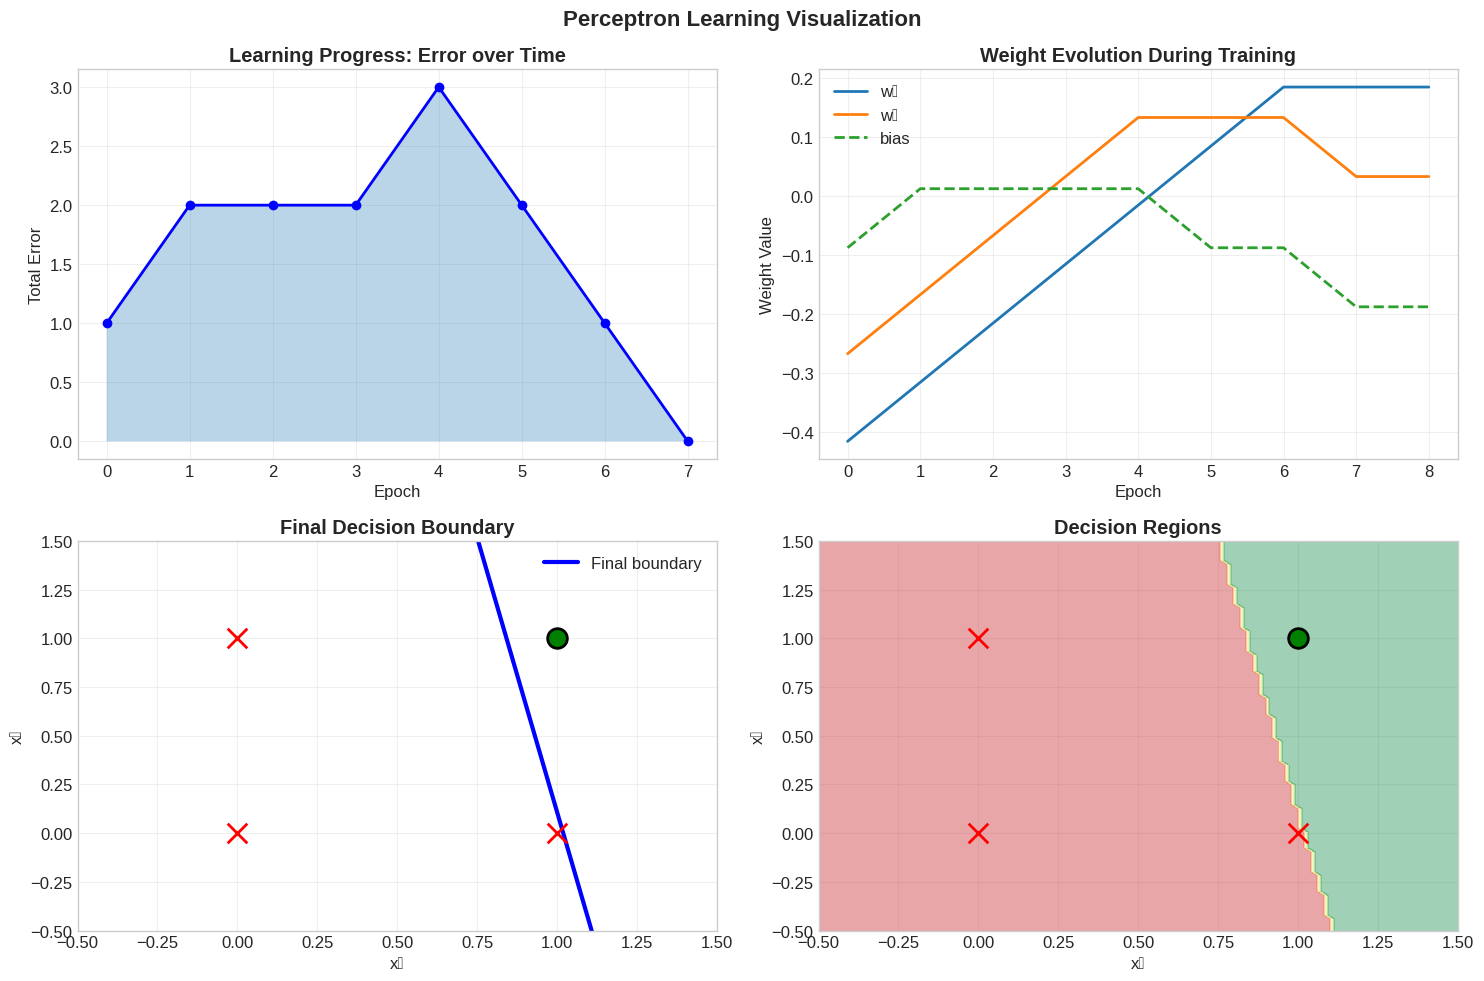

In [49]:
# Cell 8: Visualize Perceptron Learning Process
def visualize_perceptron_learning(perceptron, X, y, history):
    """Visualize how the perceptron learns over time"""

    # Create figure with subplots
    fig = plt.figure(figsize=(15, 10))

    # 1. Error over epochs
    ax1 = plt.subplot(2, 2, 1)
    ax1.plot(history['errors'], 'b-', linewidth=2, marker='o')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Total Error')
    ax1.set_title('Learning Progress: Error over Time', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.fill_between(range(len(history['errors'])), history['errors'], alpha=0.3)

    # 2. Weight evolution
    ax2 = plt.subplot(2, 2, 2)
    weights_array = np.array(history['weights'])
    ax2.plot(weights_array[:, 0], label='w₁', linewidth=2)
    ax2.plot(weights_array[:, 1], label='w₂', linewidth=2)
    ax2.plot(history['bias'], label='bias', linewidth=2, linestyle='--')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Weight Value')
    ax2.set_title('Weight Evolution During Training', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Decision boundary animation
    ax3 = plt.subplot(2, 2, 3)

    # Plot data points
    for i, (inp, out) in enumerate(zip(X, y)):
        color = 'green' if out == 1 else 'red'
        marker = 'o' if out == 1 else 'x'
        ax3.scatter(inp[0], inp[1], c=color, s=200, marker=marker,
                   edgecolors='black', linewidth=2, zorder=5)

    # Plot final decision boundary
    x_min, x_max = -0.5, 1.5
    if abs(perceptron.weights[1]) > 0.001:  # Avoid division by zero
        x_boundary = np.array([x_min, x_max])
        y_boundary = -(perceptron.weights[0] * x_boundary + perceptron.bias) / perceptron.weights[1]
        ax3.plot(x_boundary, y_boundary, 'b-', linewidth=3, label='Final boundary')

    ax3.set_xlim(x_min, x_max)
    ax3.set_ylim(-0.5, 1.5)
    ax3.set_xlabel('x₁')
    ax3.set_ylabel('x₂')
    ax3.set_title('Final Decision Boundary', fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend()

    # 4. Decision regions
    ax4 = plt.subplot(2, 2, 4)

    # Create mesh
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100),
                         np.linspace(-0.5, 1.5, 100))
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    ax4.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlGn')

    # Plot data points
    for i, (inp, out) in enumerate(zip(X, y)):
        color = 'green' if out == 1 else 'red'
        marker = 'o' if out == 1 else 'x'
        ax4.scatter(inp[0], inp[1], c=color, s=200, marker=marker,
                   edgecolors='black', linewidth=2, zorder=5)

    ax4.set_xlim(x_min, x_max)
    ax4.set_ylim(-0.5, 1.5)
    ax4.set_xlabel('x₁')
    ax4.set_ylabel('x₂')
    ax4.set_title('Decision Regions', fontweight='bold')
    ax4.grid(True, alpha=0.3)

    plt.suptitle('Perceptron Learning Visualization', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

visualize_perceptron_learning(perceptron_and, X_and, y_and, history)

In [50]:
# Cell 9: Animate the Learning Process
def animate_perceptron_learning(X, y, history, title="Perceptron Learning Animation"):
    """Create an animation showing how the decision boundary evolves"""

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot data points
    for inp, out in zip(X, y):
        color = 'green' if out == 1 else 'red'
        marker = 'o' if out == 1 else 'x'
        ax.scatter(inp[0], inp[1], c=color, s=200, marker=marker,
                  edgecolors='black', linewidth=2, zorder=5)

    # Initialize line
    line, = ax.plot([], [], 'b-', linewidth=2, label='Decision boundary')
    epoch_text = ax.text(0.02, 0.98, '', transform=ax.transAxes,
                        verticalalignment='top', fontsize=12,
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('x₁', fontsize=12)
    ax.set_ylabel('x₂', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend()

    def animate(frame):
        weights = history['weights'][frame]
        bias = history['bias'][frame]

        # Calculate decision boundary
        x_vals = np.array([-0.5, 1.5])
        if abs(weights[1]) > 0.001:
            y_vals = -(weights[0] * x_vals + bias) / weights[1]
            line.set_data(x_vals, y_vals)

        # Update epoch text
        error = history['errors'][frame] if frame < len(history['errors']) else 0
        epoch_text.set_text(f'Epoch: {frame}\nError: {error}')

        return line, epoch_text

    # Create animation
    anim = FuncAnimation(fig, animate, frames=len(history['weights']),
                        interval=200, blit=True, repeat=True)

    plt.close()  # Prevent static display
    return anim

# Create and display animation
anim = animate_perceptron_learning(X_and, y_and, history, "AND Gate: Perceptron Learning")
HTML(anim.to_jshtml())

# Modern Implementation with PyTorch

Now that we understand the fundamentals, let's implement the same concepts using PyTorch, a modern deep learning framework. PyTorch provides:

- **Automatic differentiation**: No need to manually compute gradients
- **GPU acceleration**: Fast computation for large networks
- **Modular design**: Easy to build complex architectures
- **Rich ecosystem**: Pre-built layers, optimizers, and utilities

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

class PyTorchPerceptron(nn.Module):
    """
    Perceptron implemented using PyTorch
    """
    def __init__(self, n_features):
        super(PyTorchPerceptron, self).__init__()
        # Define a single linear layer
        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        # Linear transformation followed by step function
        return torch.sigmoid(self.linear(x) * 100)  # Approximation of step function

    def predict(self, x):
        """Make binary predictions"""
        with torch.no_grad():
            outputs = self.forward(x)
            return (outputs > 0.5).float()

PyTorch version: 2.6.0+cu124


In [57]:
# Convert data to PyTorch tensors
X_tensor = torch.FloatTensor(X_and)
y_tensor = torch.FloatTensor(y_and).reshape(-1, 1)

# Create model
model = PyTorchPerceptron(n_features=2)

# Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
print("Training PyTorch Perceptron")
print("=" * 50)

losses = []
for epoch in range(100):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Print progress
    if epoch % 20 == 0:
        predictions = model.predict(X_tensor)
        accuracy = (predictions == y_tensor).float().mean()
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}")

# Final evaluation
print("\nFinal Results:")
print("Inputs | Prediction | Target")
print("-" * 30)
predictions = model.predict(X_tensor).numpy().flatten()
for inp, pred, target in zip(X_and, predictions, y_and):
    status = "✓" if pred == target else "✗"
    print(f"{inp} | {int(pred)}          | {target}     {status}")

Training PyTorch Perceptron
Epoch 0, Loss: 27.8519, Accuracy: 0.75
Epoch 20, Loss: 25.0000, Accuracy: 0.75
Epoch 40, Loss: 25.0000, Accuracy: 0.75
Epoch 60, Loss: 25.0000, Accuracy: 0.75
Epoch 80, Loss: 25.0000, Accuracy: 0.75

Final Results:
Inputs | Prediction | Target
------------------------------
[0 0] | 0          | 0     ✓
[0 1] | 0          | 0     ✓
[1 0] | 0          | 0     ✓
[1 1] | 0          | 1     ✗


In [71]:
# Cell 13: Multi-Layer Perceptron for XOR
class MultiLayerPerceptron(nn.Module):
    """
    Multi-layer perceptron that can solve XOR
    """
    def __init__(self):
        super(MultiLayerPerceptron, self).__init__()
        # Two layers: hidden layer with 2 neurons, output layer with 1 neuron
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.activation(self.output(x))
        return x

    def predict(self, x):
        with torch.no_grad():
            outputs = self.forward(x)
            return (outputs > 0.5).float()

# XOR data
X_xor = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = torch.FloatTensor([[0], [1], [1], [0]])

# Create and train model
mlp = MultiLayerPerceptron()
criterion = nn.BCELoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.1)

print("Training Multi-Layer Perceptron for XOR")
print("=" * 50)

mlp_losses = []
for epoch in range(1000):
    outputs = mlp(X_xor)
    loss = criterion(outputs, y_xor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    mlp_losses.append(loss.item())

    if epoch % 200 == 0:
        accuracy = (mlp.predict(X_xor) == y_xor).float().mean()
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}")

# Final results
print("\n✓ XOR Problem Solved!")
print("Inputs | Prediction | Target")
print("-" * 30)
predictions = mlp.predict(X_xor).numpy().flatten()
for inp, pred, target in zip(X_xor.numpy(), predictions, y_xor.numpy().flatten()):
    status = "✓" if pred == target else "✗"
    print(f"{inp} | {int(pred)}          | {int(target)}     {status}")

Training Multi-Layer Perceptron for XOR
Epoch 0, Loss: 0.7090, Accuracy: 0.50
Epoch 200, Loss: 0.0098, Accuracy: 1.00
Epoch 400, Loss: 0.0034, Accuracy: 1.00
Epoch 600, Loss: 0.0018, Accuracy: 1.00
Epoch 800, Loss: 0.0011, Accuracy: 1.00

✓ XOR Problem Solved!
Inputs | Prediction | Target
------------------------------
[0. 0.] | 0          | 0     ✓
[0. 1.] | 1          | 1     ✓
[1. 0.] | 1          | 1     ✓
[1. 1.] | 0          | 0     ✓


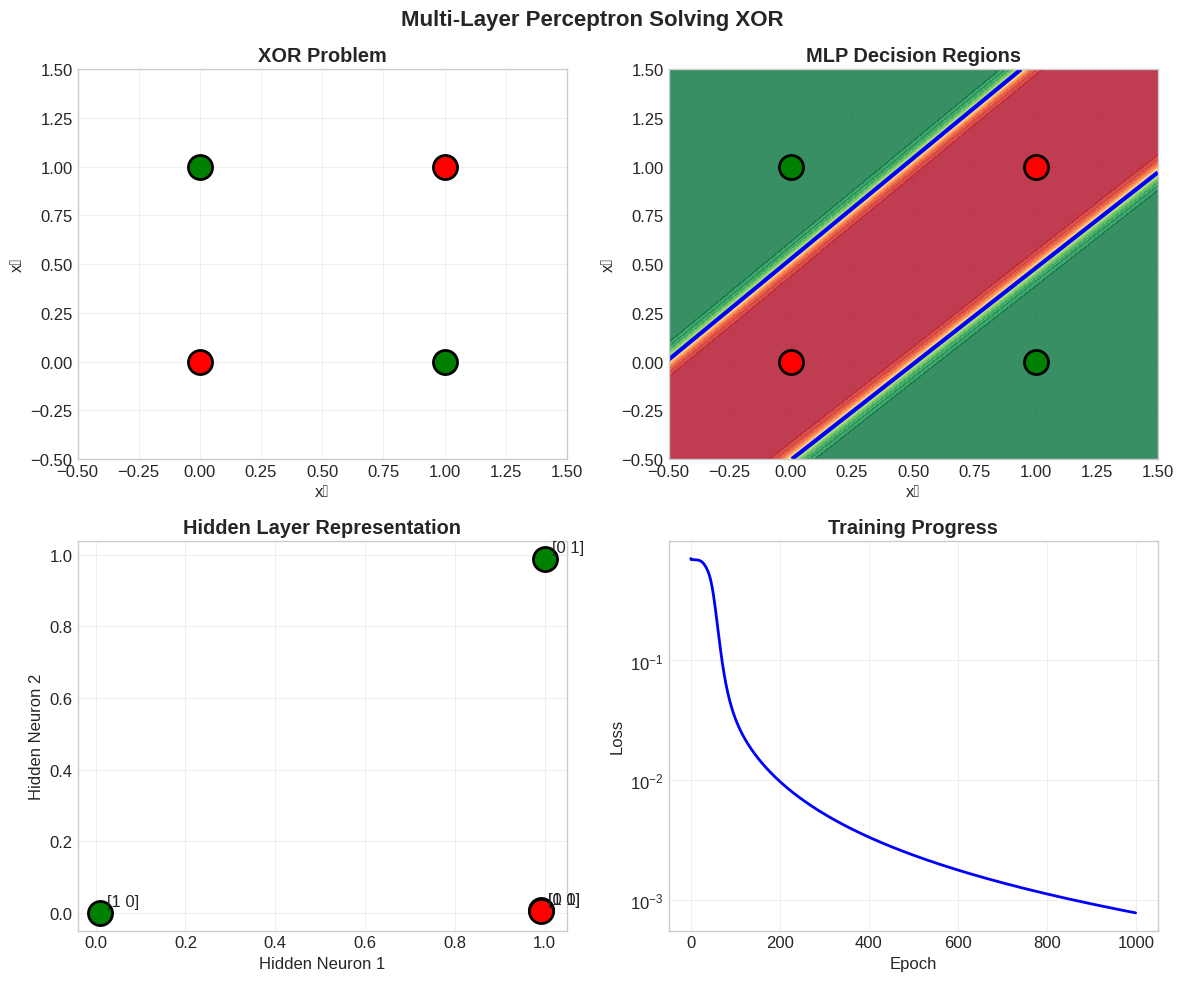

In [72]:
# Cell 14: Visualize MLP solving XOR
def visualize_mlp_xor(model):
    """Visualize how MLP solves the XOR problem"""

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # 1. Original XOR problem
    ax = axes[0, 0]
    xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    xor_outputs = [0, 1, 1, 0]

    for inp, out in zip(xor_inputs, xor_outputs):
        color = 'green' if out == 1 else 'red'
        ax.scatter(inp[0], inp[1], c=color, s=300, edgecolors='black', linewidth=2)

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title('XOR Problem', fontweight='bold')
    ax.grid(True, alpha=0.3)

    # 2. MLP decision regions
    ax = axes[0, 1]
    x_min, x_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(x_min, x_max, 100))

    mesh_input = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        Z = model(mesh_input).numpy().reshape(xx.shape)

    contour = ax.contourf(xx, yy, Z, levels=20, cmap='RdYlGn', alpha=0.8)
    ax.contour(xx, yy, Z, levels=[0.5], colors='blue', linewidths=3)

    for inp, out in zip(xor_inputs, xor_outputs):
        color = 'green' if out == 1 else 'red'
        ax.scatter(inp[0], inp[1], c=color, s=300, edgecolors='black', linewidth=2)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(x_min, x_max)
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title('MLP Decision Regions', fontweight='bold')
    ax.grid(True, alpha=0.3)

    # 3. Hidden layer activations
    ax = axes[1, 0]

    # Get hidden layer outputs
    with torch.no_grad():
        hidden_outputs = torch.sigmoid(model.hidden(X_xor)).numpy()

    # Plot hidden space
    for i, (h_out, target) in enumerate(zip(hidden_outputs, xor_outputs)):
        color = 'green' if target == 1 else 'red'
        ax.scatter(h_out[0], h_out[1], c=color, s=300,
                  edgecolors='black', linewidth=2)
        ax.annotate(f'{xor_inputs[i]}', (h_out[0], h_out[1]),
                   xytext=(5, 5), textcoords='offset points')

    ax.set_xlabel('Hidden Neuron 1')
    ax.set_ylabel('Hidden Neuron 2')
    ax.set_title('Hidden Layer Representation', fontweight='bold')
    ax.grid(True, alpha=0.3)

    # 4. Training loss
    ax = axes[1, 1]
    ax.plot(mlp_losses, 'b-', linewidth=2)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title('Training Progress', fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')

    plt.suptitle('Multi-Layer Perceptron Solving XOR', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

visualize_mlp_xor(mlp)

# Summary and Conclusions

We've journeyed from the first computational neuron model to modern deep learning:

## 1. **McCulloch-Pitts Neuron (1943)**
- First mathematical model of a neuron
- Binary inputs/outputs, fixed weights
- Could implement simple logic gates
- **Limitation**: No learning capability

## 2. **Perceptron (1957)**
- Revolutionary learning algorithm
- Adjustable weights through training
- Convergence guarantee for linearly separable problems
- **Limitation**: Cannot solve XOR (non-linearly separable)

## 3. **Multi-Layer Perceptron**
- Multiple layers enable non-linear decision boundaries
- Can solve XOR and other complex problems
- Foundation for modern deep learning
- **PyTorch**: Modern framework for building neural networks

## Key Takeaways:
1. **Linear Separability**: Single neurons can only solve linearly separable problems
2. **Learning**: The perceptron learning rule was the birth of machine learning
3. **Hidden Layers**: Enable learning of non-linear patterns
4. **Modern Tools**: PyTorch makes implementation efficient and scalable

This foundation enables understanding of:
- Deep Neural Networks
- Convolutional Neural Networks
- Recurrent Neural Networks
- Transformers
- And all modern AI architectures!